In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_red = pd.read_csv("winequality-red.csv")

In [25]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Let's start with some basic, multiple linear regression

Mean Squared Error (MSE): 0.39
R-squared (R²): 0.40


Text(0, 0.5, 'actual quality')

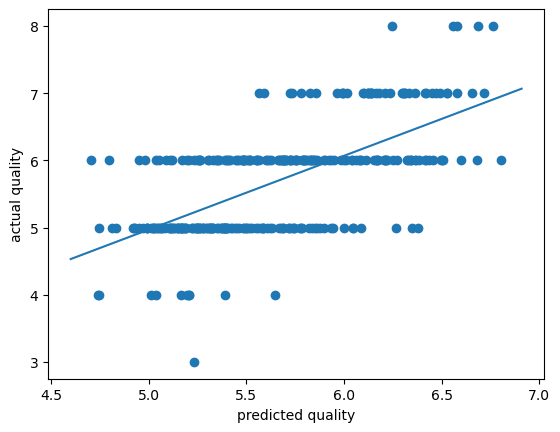

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress

df = df_red

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

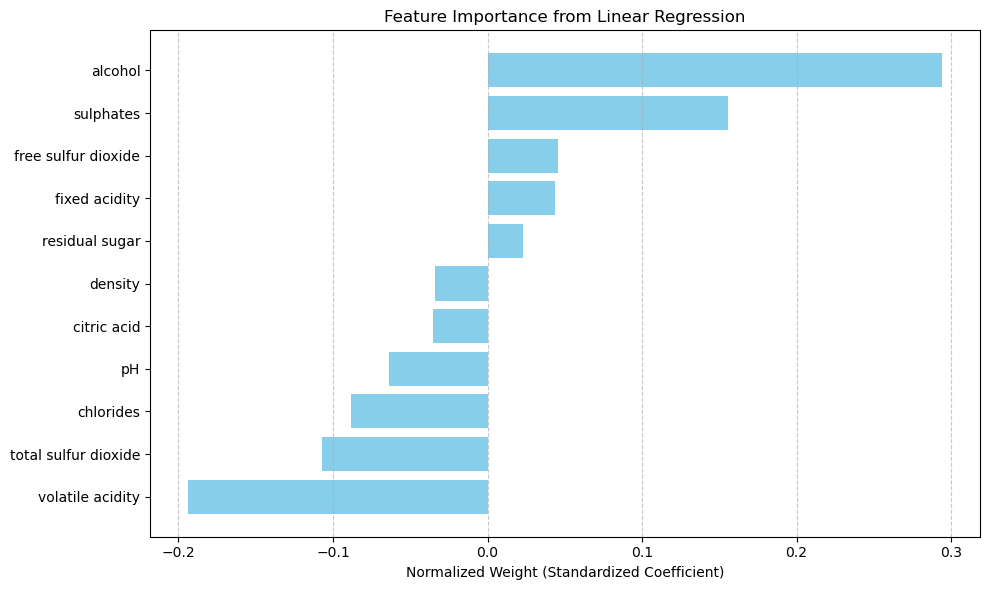

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})



import matplotlib.pyplot as plt

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [28]:
df_white = pd.read_csv("winequality-white.csv")

In [29]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Mean Squared Error (MSE): 0.57
R-squared (R²): 0.27


Text(0, 0.5, 'actual quality')

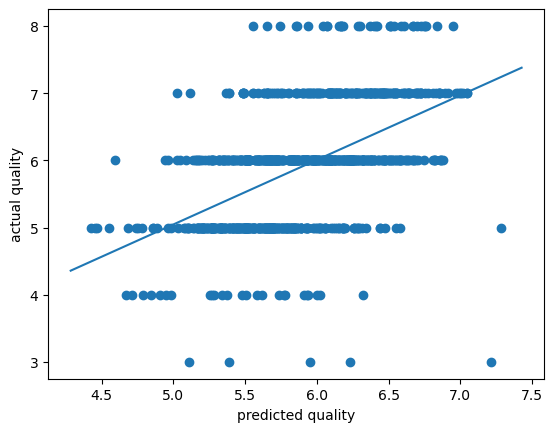

In [30]:
df = df_white

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

                 Feature  Normalized Weight
3         residual sugar           0.413243
10               alcohol           0.238071
8                     pH           0.103628
9              sulphates           0.072060
5    free sulfur dioxide           0.063477
0          fixed acidity           0.055285
2            citric acid           0.002673
4              chlorides          -0.005402
6   total sulfur dioxide          -0.012142
1       volatile acidity          -0.187779
7                density          -0.449440


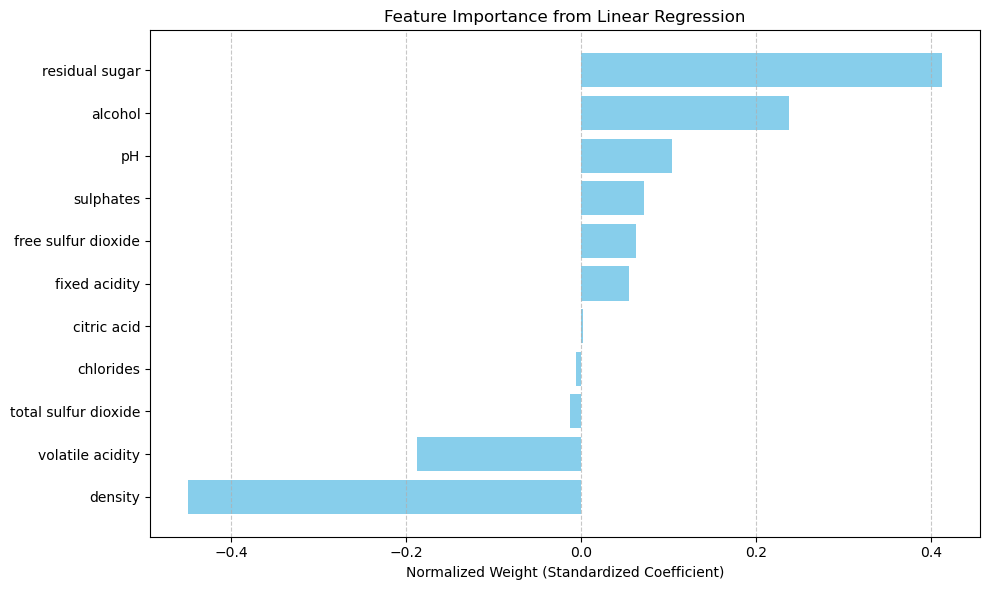

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})

# Display results
print(normalized_weights.sort_values(by='Normalized Weight', ascending=False))

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Load datasets
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

# Add label column
df_red['wine_type'] = 0  # Red = 0
df_white['wine_type'] = 1  # White = 1

# Combine datasets
df_combined = pd.concat([df_red, df_white], ignore_index=True)

X = df_combined.drop('wine_type', axis=1)
y = df_combined['wine_type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



In [311]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [312]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[237   3]
 [  2 733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       240
           1       1.00      1.00      1.00       735

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



In [313]:
# Coefficients: which features help distinguish red vs white
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0]
}).sort_values(by='Weight', key=abs, ascending=False)

print(feature_importance)


                 Feature    Weight
3         residual sugar  3.032042
7                density -2.930400
6   total sulfur dioxide  2.893223
1       volatile acidity -1.149120
4              chlorides -1.139554
10               alcohol -0.897045
5    free sulfur dioxide -0.892246
9              sulphates -0.808367
0          fixed acidity -0.635196
8                     pH -0.548681
2            citric acid  0.538997
11               quality -0.165000


In [314]:
X_test.shape

(975, 12)

In [315]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy

model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7619 - loss: 0.5626 - precision_8: 0.7619 - recall_8: 1.0000
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7579 - loss: 0.4434 - precision_8: 0.7579 - recall_8: 1.0000
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8095 - loss: 0.3227 - precision_8: 0.7989 - recall_8: 1.0000
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9745 - loss: 0.2265 - precision_8: 0.9684 - recall_8: 0.9988
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9880 - loss: 0.1707 - precision_8: 0.9895 - recall_8: 0.9947
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.9893 - loss: 0.1330 - precision_8: 0.9924 - recall_8: 0.9932
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9901 - loss: 0.1077 - precision_8: 0.9935 - recall_8: 0.9934
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9923 - loss: 0.0830 -

In [316]:
y_pred = model.predict(X_test)

correct_red = np.sum(np.array(y_test)*y_pred[:,0].round())
total_red = np.sum(y_test)

correct_white = np.sum(np.array(1-y_test)*(1-y_pred)[:,0].round())
total_white = np.sum(1-y_test)

print(f"correctly labelled red wines: {correct_red} out of {total_red}")
print(f"correctly labelled white wines: {correct_white} out of {np.sum(total_white)}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
correctly labelled red wines: 732.0 out of 735
correctly labelled white wines: 239.0 out of 240


In [317]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9977 - loss: 0.0106 - precision_8: 0.9996 - recall_8: 0.9973


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: 0.7047
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/2
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 0.6513
Epoch 2/2
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.4664
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/3
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - loss: 0.5302
Epoch 2/3
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3802
Epoch 3/3
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.2607
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/4
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 0.5519
Epoch 2/4
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.4453
Epoch 3/4
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.3228
Epoch 4/4
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.2033
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 0.5540
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 

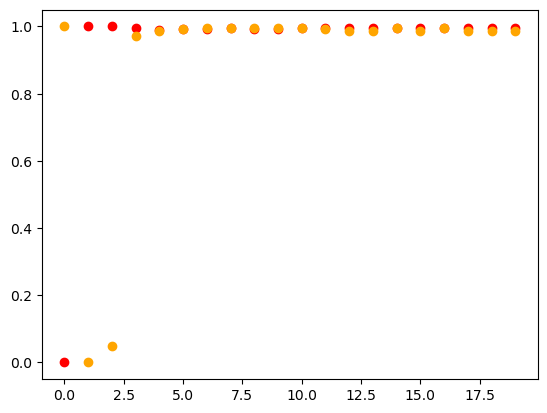

In [318]:
f,ax = plt.subplots(1,1)

for i in range(20):
    model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
    ])

    model.compile(loss=BinaryCrossentropy())

    model.fit(X_train, y_train, epochs=i)
    y_pred = model.predict(X_test)

    correct_red = np.sum(np.array(y_test)*y_pred[:,0].round())
    total_red = np.sum(y_test)

    correct_white = np.sum(np.array(1-y_test)*(1-y_pred)[:,0].round())
    total_white = np.sum(1-y_test)

    ax.scatter(i, correct_red/total_red, marker="o", color="red")
    ax.scatter(i, correct_white/total_white, marker="o", color="orange")

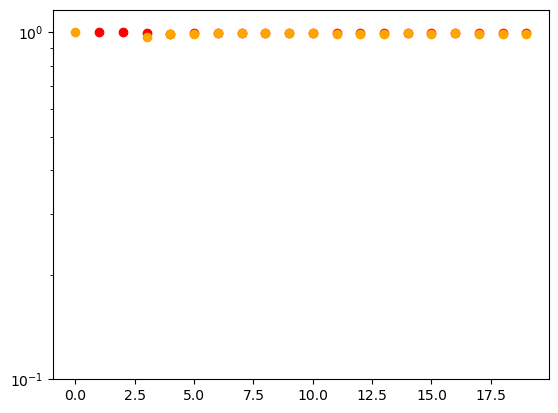

In [319]:
ax.semilogy()
ax.set_ylim([.1,ax.get_ylim()[1]])
f

In [322]:
y.value_counts()


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [323]:
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

# Add label column
df_red['wine_type'] = 0  # Red = 0
df_white['wine_type'] = 1  # White = 1

# Combine datasets
df_combined = pd.concat([df_red, df_white], ignore_index=True)

min_count = 20  # for example, remove any quality class with <10 instances
count_series = df_combined["quality"].value_counts()
valid_qualities = count_series[count_series >= min_count].index
df_filtered = df_combined[df_combined["quality"].isin(valid_qualities)]

X = df_filtered.drop('wine_type', axis=1).drop('quality', axis=1)
y = df_filtered['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [326]:
from keras.losses import MeanSquaredError

# model = Sequential([
#     Dense(units=15, activation="relu"),
#     Dense(units=10, activation="relu"),
#     Dense(units=5, activation="relu"),
#     Dense(units=1, activation="relu"),
# ])

model = Sequential([
    Dense(units=15, activation=None),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=1, activation="relu"),
])


model.compile(optimizer='adam', loss=MeanSquaredError())

model.fit(X_test, y_test, epochs=100)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - loss: 34.2786 
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 33.6459
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 30.9845
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 27.1524
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 20.9560
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 13.6895
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 8.0788
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 4.9894
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 3.9768
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 3.0002
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 2.8041
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 2.2829
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 2.0433
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 2.2131
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


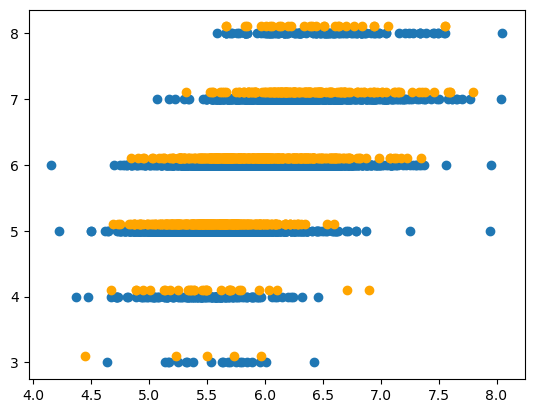

In [ ]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train, )
ax.scatter(model.predict(X_test), y_test+.1,color="orange")

In [345]:
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(units=15, activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=10, activation="linear"),
])


model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True))

model.fit(X_train, y_train, epochs=100) #output with a progress bar
# model.fit(X_train, y_train, epochs=100, verbose=0)


Epoch 1/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 2.3200
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 2.0922
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1.7915
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 1.2518
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 1.1015
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 1.0921
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 1.0569
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 1.0606
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 1.0586
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 1.0593
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 1.0581
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 1.0504
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1.0532
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 1.0315
Epoch 15/100
14

In [346]:
logits = model(X_test)
f_x = tf.nn.softmax(logits)
print(f_x.shape, y_test.shape)

(974, 10) (974,)


Text(0, 0.5, 'actual quality')

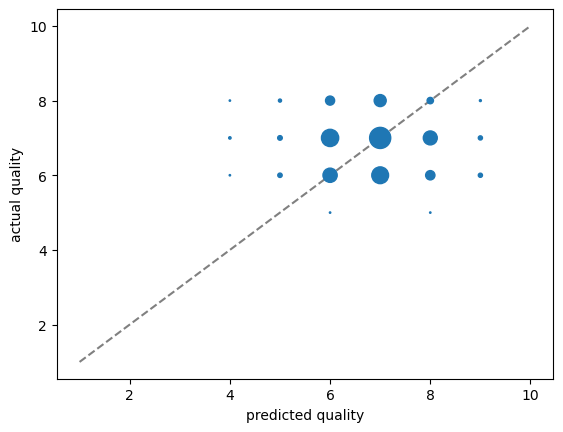

In [347]:
f,ax = plt.subplots(1,1)

x,y = np.arange(1,11),np.arange(1,11)
X,Y = np.meshgrid(x,y)

c = np.zeros((10,10))
for i,j in zip(
    np.argmax(f_x, axis=1), y_train
):
    c[i,j] += 1

ax.scatter(X,Y,c)
ax.plot(x,x, color="grey", linestyle="--", zorder=0)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")


## Let's do some model validation:
training data, cross validation data, and testing data

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.03      0.06        32
           5       0.59      0.59      0.59       321
           6       0.54      0.64      0.58       425
           7       0.51      0.46      0.49       162
           8       0.00      0.00      0.00        29

    accuracy                           0.55       974
   macro avg       0.36      0.29      0.29       974
weighted avg       0.53      0.55      0.53       974



c:\Users\pietr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
c:\Users\pietr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
c:\Users\pietr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


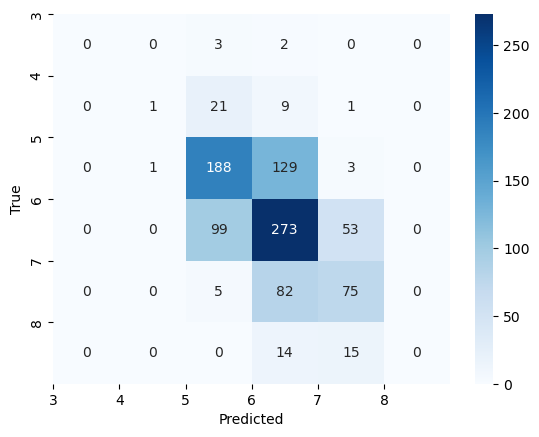

In [348]:
y_pred = model.predict(X_test).argmax(axis=1)  # Get class index
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
f,ax = plt.subplots(1,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ax.set_xticks([0,1,2,3,4,5], labels=["3","4","5","6","7","8"])
ax.set_yticks([0,1,2,3,4,5], labels=["3","4","5","6","7","8"])
# ax.set_xticklabels()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Time for a decision tree

In [6]:
df_wordy = pd.read_csv("WineDataset.csv")
df_wordy

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,£11.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021,Vouvray
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,£13.99 per bottle,75CL,Pinot Noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021,NaN
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,£85.00 per bottle,75CL,Cabernet Sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010,Clare Valley
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,"In 1961, Sir Robert Menzies said that Yalumba'...",£37.99 per bottle,75CL,Cabernet Sauvignon,NaN,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016,Coonawarra


In [7]:
df = df_wordy

prices,vintages,abvs = [],[],[]
for i,row in df.iterrows():

    vintage = row.Vintage
    price = row.Price
    abv = row.ABV
    if str(vintage).isnumeric() and " per bottle" in price:
        vintages.append(int(vintage))
        price = float(price.split(" per bottle")[0][1:])
        prices.append(price)
        abvs.append(float(abv[4:-1]))

prices,vintages,abvs = np.array(prices), np.array(vintages), np.array(abvs)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# ---- 1️⃣ Load and clean data ----
df_wordy = pd.read_csv("WineDataset.csv")
mask = df_wordy["Vintage"].astype(str).str.isnumeric() & df_wordy["Price"].str.contains(" per bottle")
df = df_wordy[mask].copy()
df.drop("Characteristics", axis=1)

# Extract price
df["Price_value"] = df["Price"].str.split(" per bottle").str[0].str[1:].astype(float)

# ---- 2️⃣ Combine text columns ----
text_columns = ["Grape", "Characteristics", "Region", "Style", "Appellation"]
df["text_for_model"] = df[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)

# ---- 3️⃣ Split data ----
X_train, X_test, y_train, y_test = train_test_split(df["text_for_model"], df["Price_value"],
                                                    test_size=0.2, random_state=42)

# ---- 4️⃣ Build pipeline ----
model = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words="english", max_features=1000)),  # limit features
    ("regressor", DecisionTreeRegressor(random_state=42, max_depth=10))
])

# ---- 5️⃣ Train ----
model.fit(X_train, y_train)

# ---- 6️⃣ Evaluate ----
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.3f}")



Root Mean Squared Error: 44.28
R^2 Score: 0.224


In [51]:
vectorizer = model.named_steps["vectorizer"]
regressor = model.named_steps["regressor"]

# All the words
feature_names = vectorizer.get_feature_names_out()

# Importance of each feature
importances = regressor.feature_importances_

word_importance = pd.DataFrame({
    "word": feature_names,
    "importance": importances
})
word_importance = word_importance.sort_values(by="importance", ascending=False)

# Show top 20 words
print(word_importance.head(20))


           word  importance
64        bread    0.127900
93   chardonnay    0.107971
388        rich    0.083322
441       stone    0.066292
442      stones    0.065688
51   blackberry    0.059667
361       pinot    0.052518
508      walnut    0.034554
222    hazelnut    0.030468
421     savoury    0.030294
259   liquorice    0.028993
49      biscuit    0.020984
40      barossa    0.019646
131       cream    0.017606
379   raspberry    0.015270
56       bodied    0.014430
68     burgundy    0.013567
50        black    0.012144
458      toasty    0.008555
437       spice    0.008139


Text(0, 0.5, 'actual price')

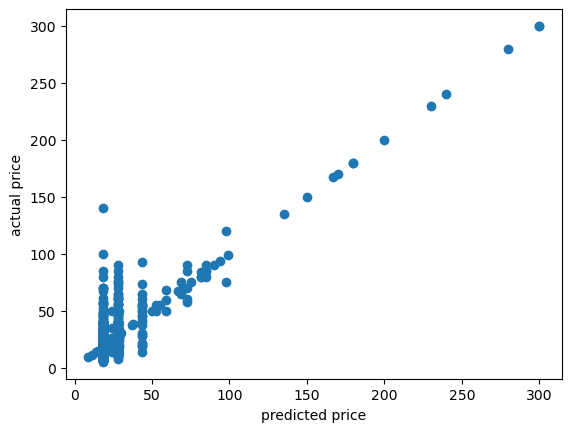

In [40]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")

Text(0, 0.5, 'actual price')

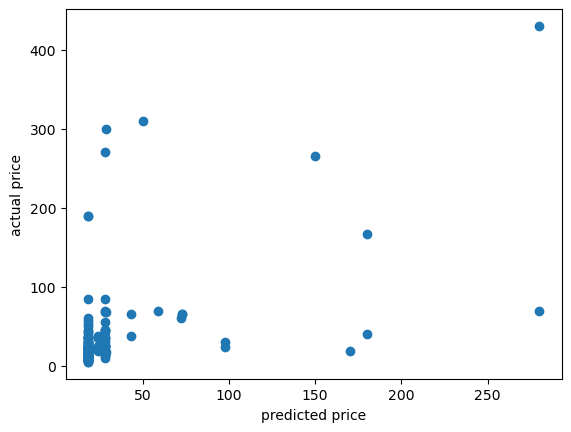

In [39]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_test), y_test)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")